# CNN for Particle Classification

In this notebook, we train 10 layers deep CNN for particle type classification ($e^-$, $\mu^-$, and $\gamma$) using the workshop dataset.

In [ ]:
from __future__ import print_function
from IPython.display import display
import torch, time
import numpy as np

We define 2 functions to be called in the training loop: forward and backward. These functions implement the evaluation of the results, error (loss) definition, and propagation of errors (gradients) back to update the network parameters.

Also import `CSVData` from our utility module, which lets us write train log (accuracy, loss, etc.) in a csv file.

Finally, we're ready to run the training! Let's create a dataloader, write a loop to  call forward and backward.

<class 'h5py._hl.files.File'>
[u'directions', u'energies', u'event_data', u'labels', u'pids', u'positions']
(100000, 88, 168, 2)
(100000, 1, 3)
(100000, 1)


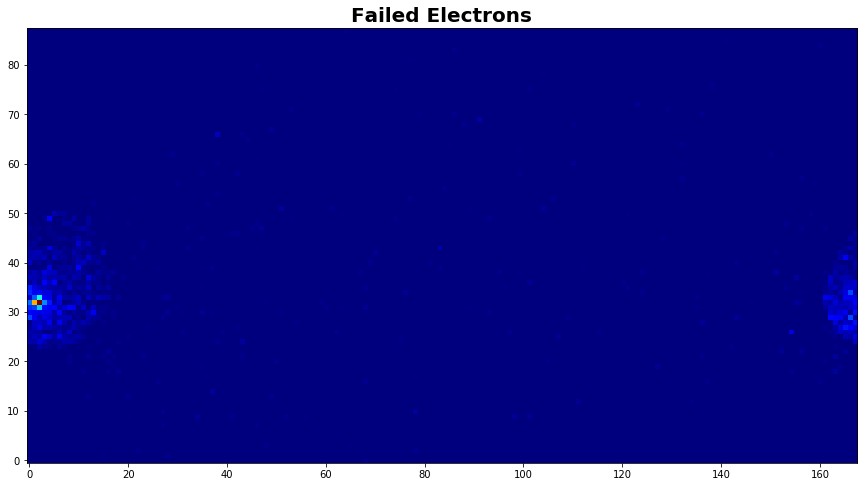

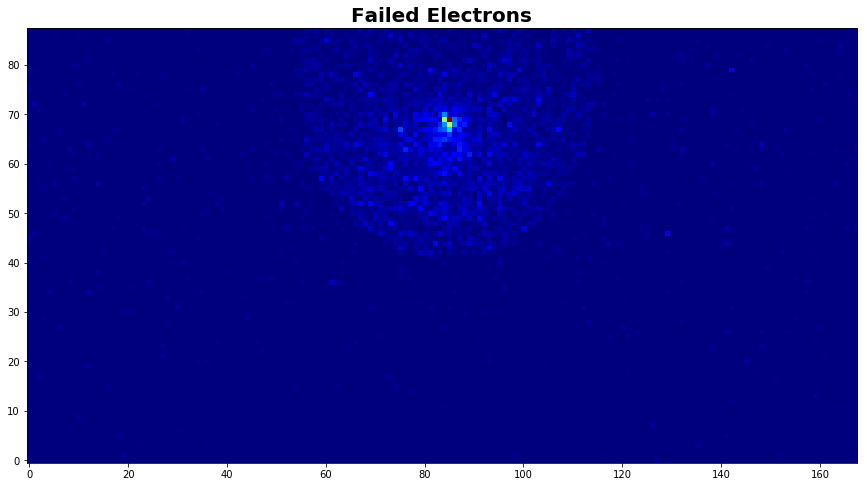

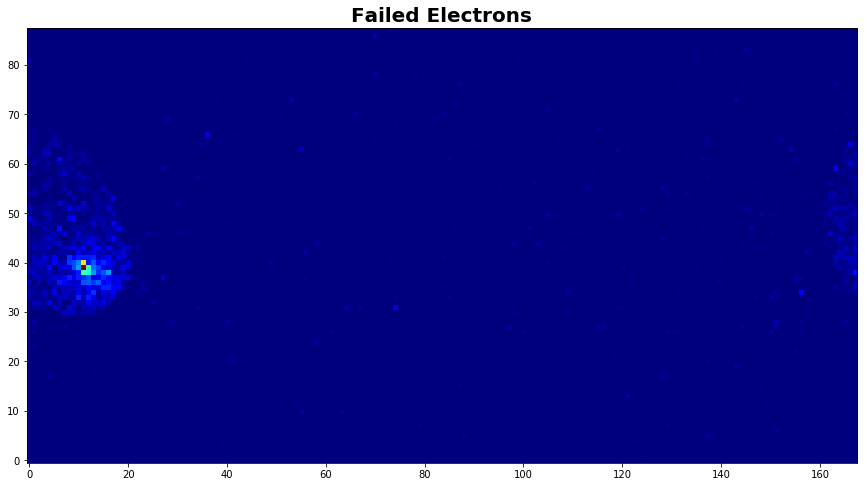

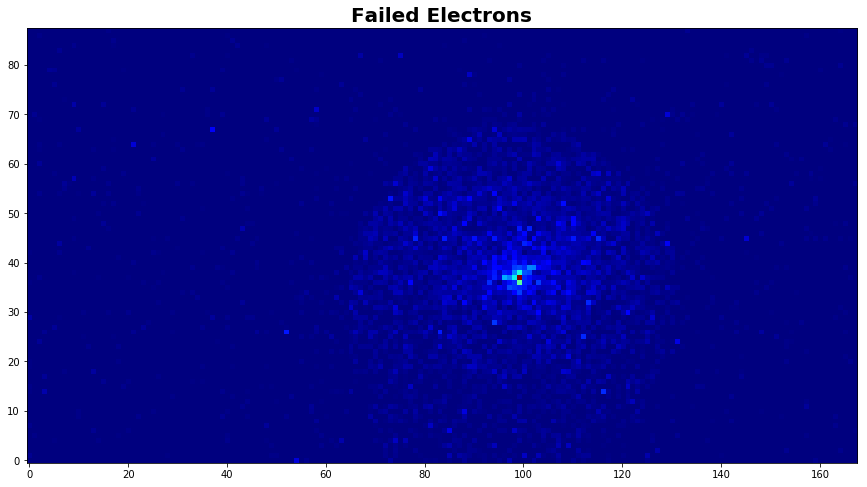

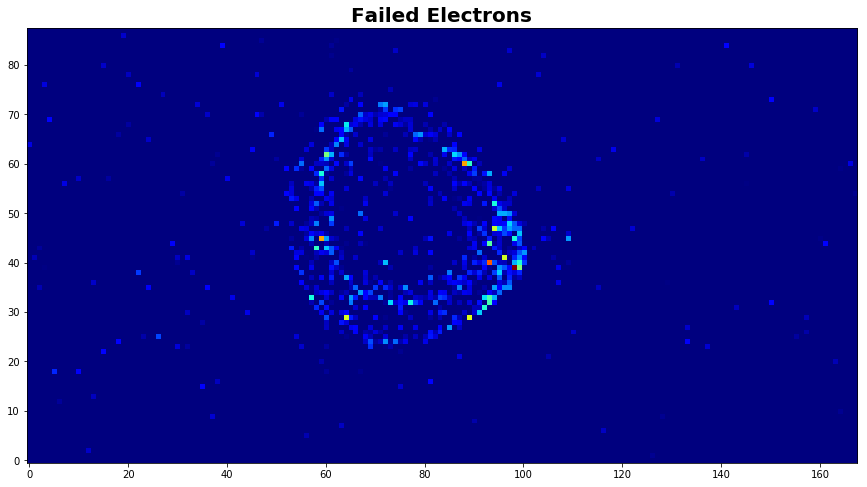

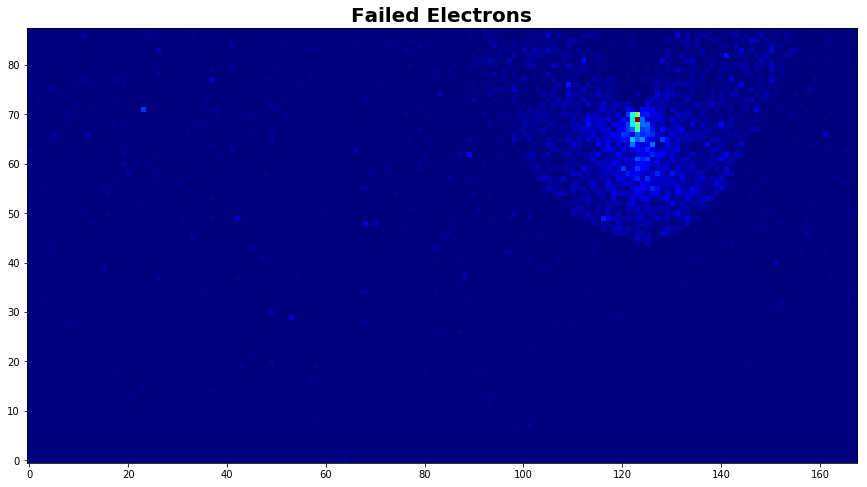

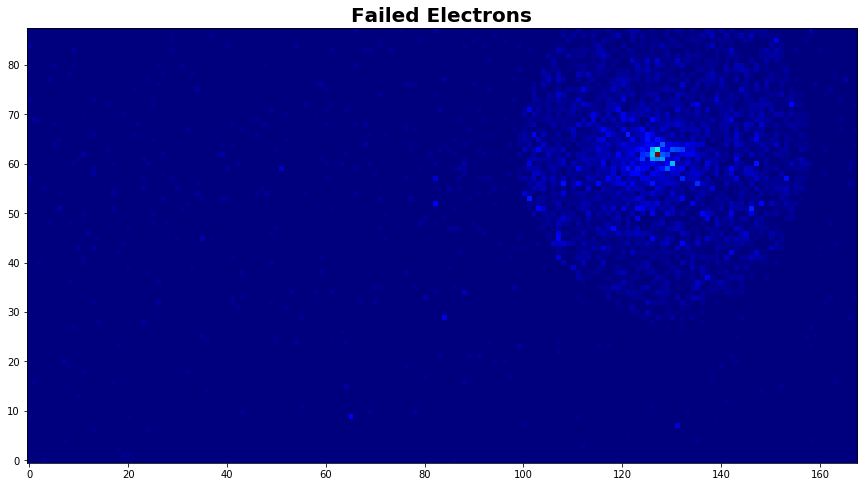

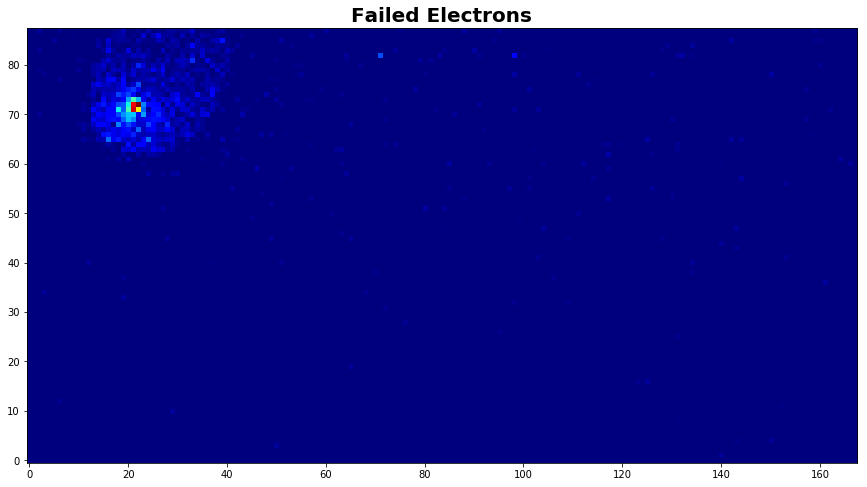

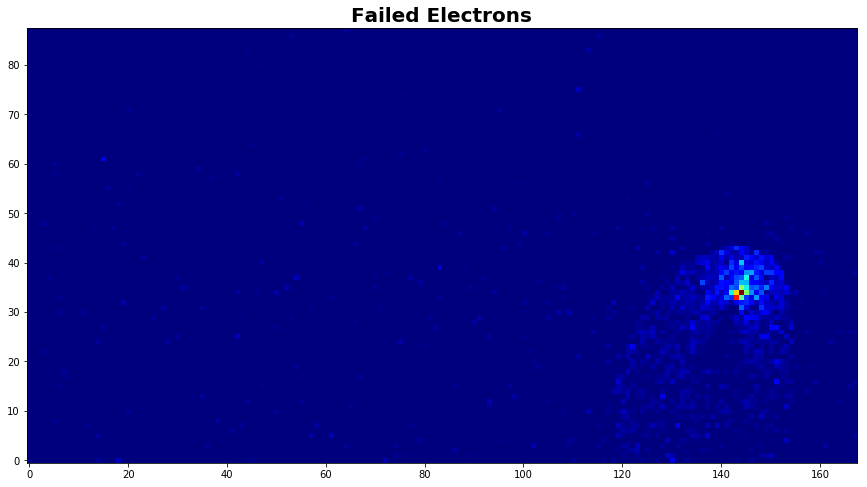

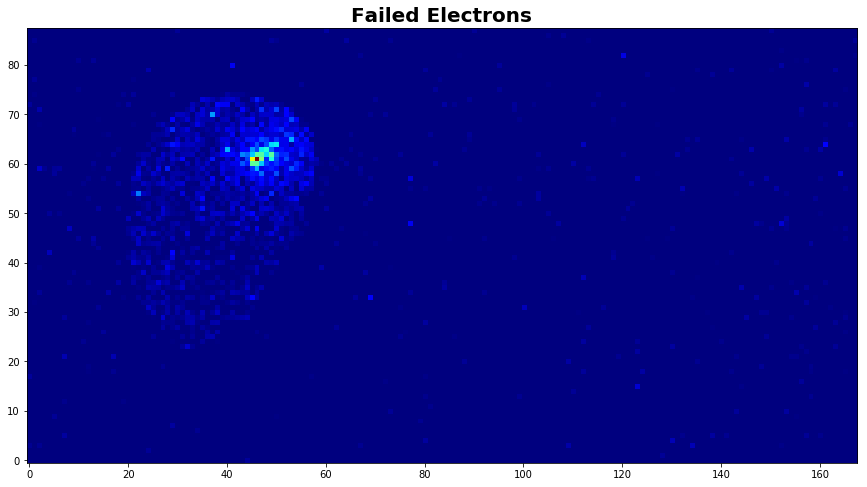

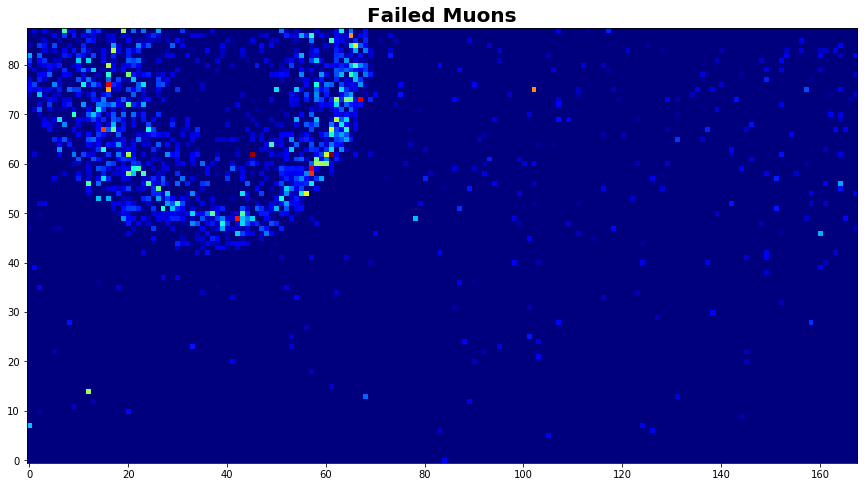

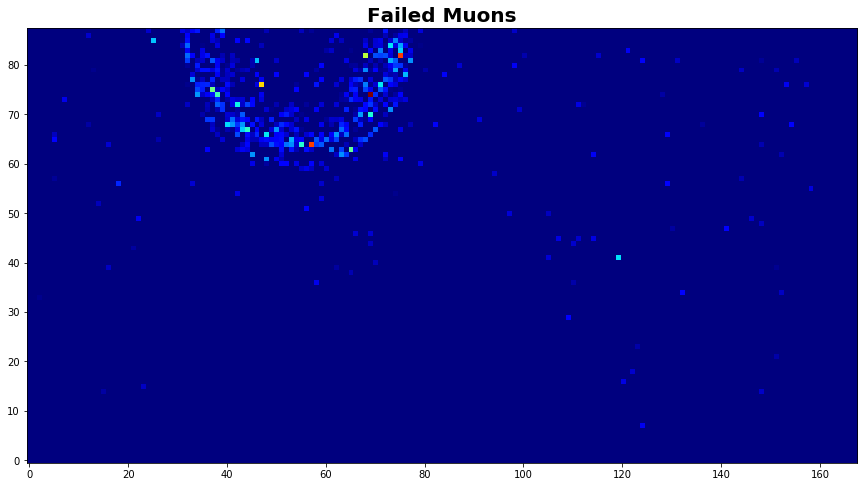

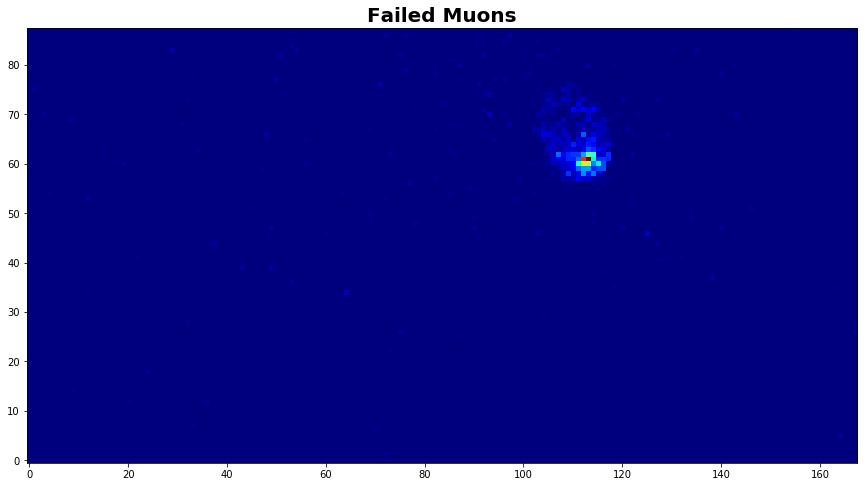

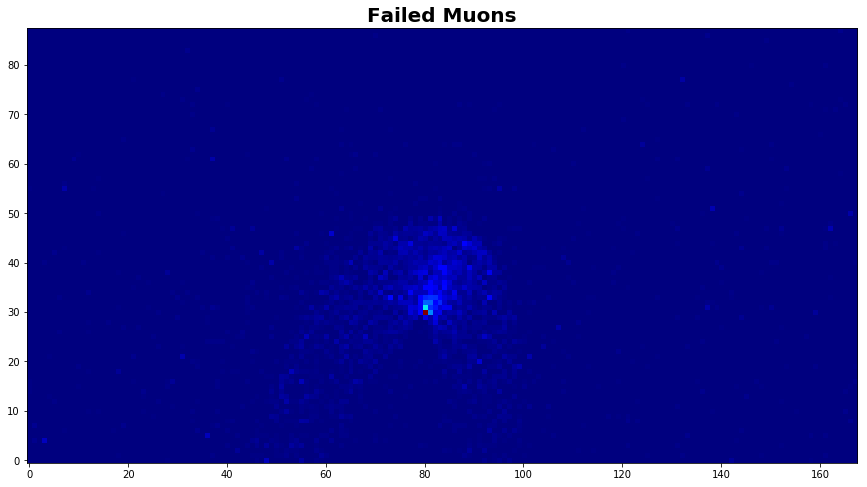

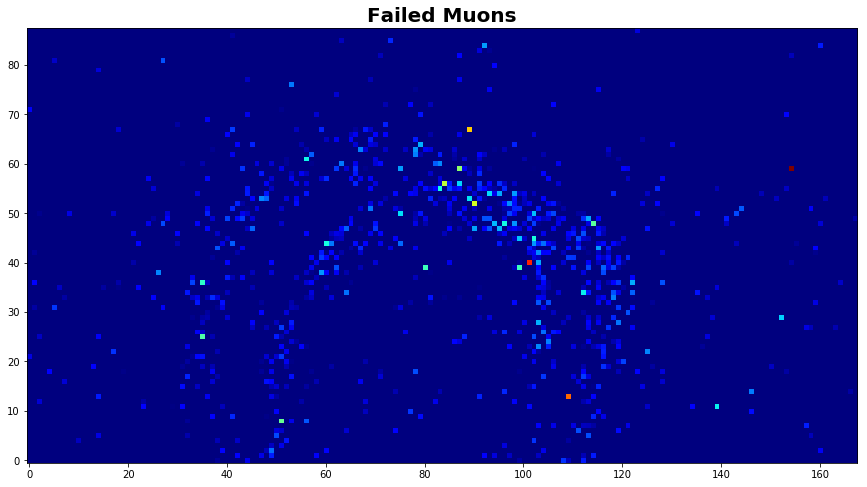

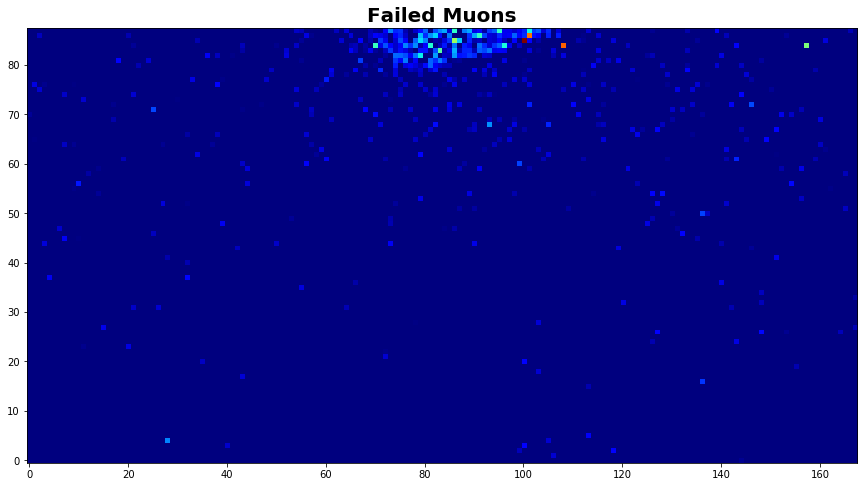

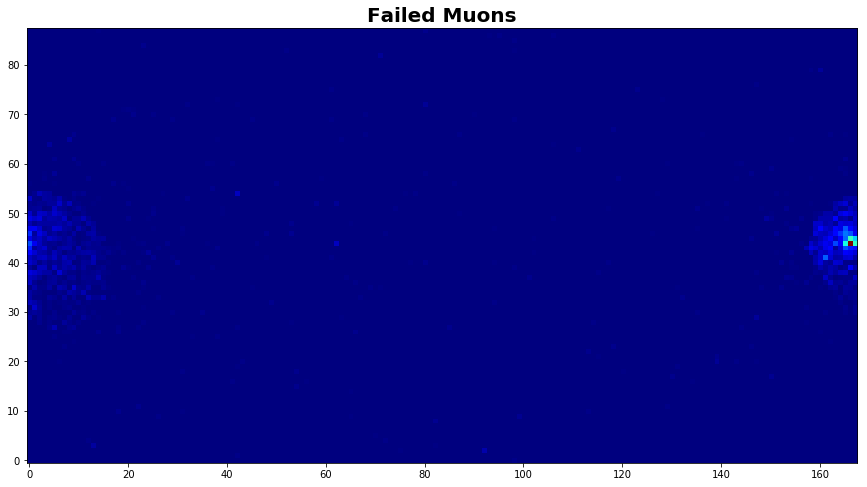

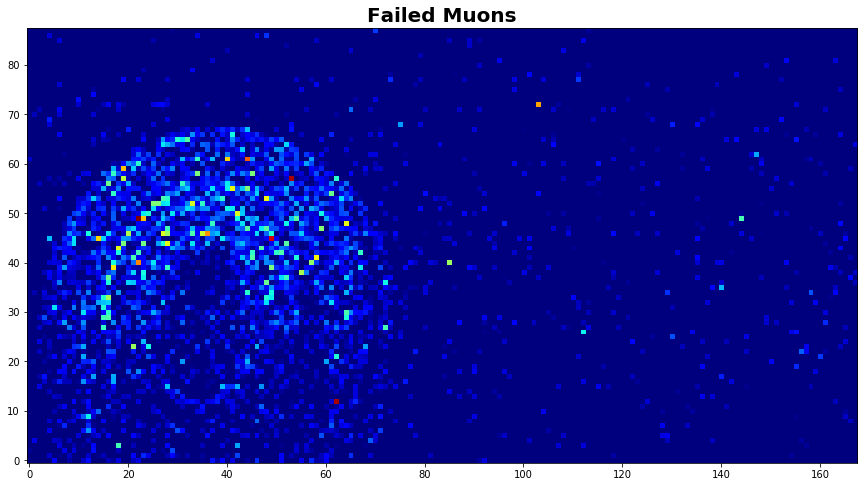

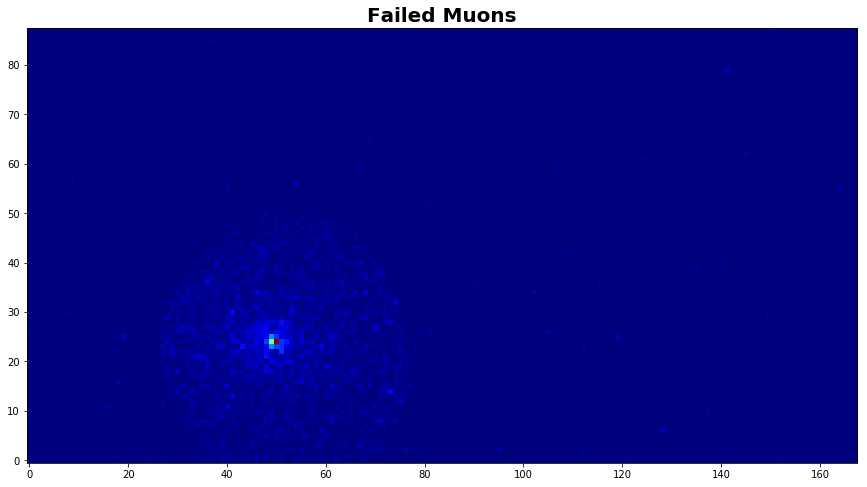

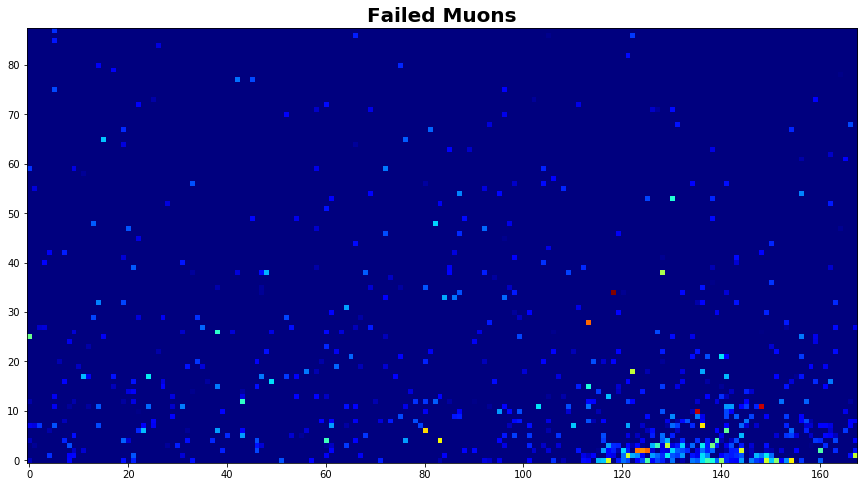

In [20]:
import numpy as np
from __future__ import print_function

# Change if you want to open a different file
#DATA_FILE_PATH='/data/hkml_data/IWCDgrid/varyE/e-/IWCDgrid_varyE_e-_R0cm_20-2000MeV_100evts_1.npz'
#DATA_FILE_PATH='/data/hkml_data/IWCDgrid/varyAll/e-/IWCDgrid_varyAll_e-_20-2000MeV_100k_v2.h5'
DATA_FILE_PATH='/data/hkml_data/IWCDgrid/varyAll/mu-/IWCDgrid_varyAll_mu-_20-2000MeV_100k_v2.h5'


#DATA_DIRS=['/data/hkml_data/IWCDgrid/varyAll/e-','/data/hkml_data/IWCDgrid/varyAll/mu-']

# Open file
#f = np.load(DATA_FILE_PATH)
import h5py
f = h5py.File(DATA_FILE_PATH,mode='r')
    
# Print the object type
print (type(f))

print (f.keys())

print (f['event_data'].shape)
print (f['positions'].shape)
print (f['energies'].shape)

import matplotlib.pyplot as plt
%matplotlib inline

failed_events = [30957, 48590, 38780, 59796, 53657, 44295, 41495, 57406, 40309, 41134, 36736, 47123, 45455, 39177, 49799, 53374, 42994, 44798, 48026, 49787, 37977, 40721, 41535, 31482, 51904, 39549, 42536, 52167, 48831, 32893, 49895, 41934, 35865, 30725, 39795, 57567]


failed_events2 = [41868, 32010, 45632, 36282, 54024, 37418, 53632, 35847, 39374, 33936, 43979, 38206, 32211, 55100, 42337, 39125, 48742, 48341, 50753, 59420, 30875, 49486, 36854, 57709, 40709, 48945, 57770, 45931, 42032, 41809, 55683, 57159, 41393, 53890, 34607, 46431, 58959, 58629, 53077, 30454, 47127, 31947, 40499, 36014, 33212, 41646, 55116, 58821, 46654, 44821, 47078, 56653, 33424, 52527, 50526, 33310, 54036, 58613, 55281, 51162, 52143, 45056, 30562, 56594]


#Failed *** 12956 32957 1
#Failed *** 5962 35961 0
#Failed *** 1808 31807 0
#Failed *** 2459 32458 0
#Failed *** 16370 36371 1
#Failed *** 134 30133 0
#Failed *** 16069 36070 1
#Failed *** 8645 38644 0


#Failed *** 7819 27818
#Failed *** 17935 27936
#Failed *** 8741 28740
#Failed *** 10662 20663
#Failed *** 17073 27074
#Failed *** 9810 29809
#Failed *** 13586 23587
#Failed *** 3967 23966
#Failed *** 11576 21577
#Failed *** 14522 24523
#Failed *** 736 20735
#Failed *** 267 20266

for idx in xrange(10):
    
    fig, ax = plt.subplots(figsize=(16,8),facecolor='w')
    plt.imshow(f['event_data'][failed_events[idx],:,:,0],cmap='jet',origin='lower')
    ax.set_title('Failed Electrons',fontsize=20,fontweight='bold')
    plt.show()

for idx in xrange(10):
    
    fig, ax = plt.subplots(figsize=(16,8),facecolor='w')
    plt.imshow(f['event_data'][failed_events2[idx],:,:,0],cmap='jet',origin='lower')
    ax.set_title('Failed Muons',fontsize=20,fontweight='bold')
    plt.show()


f.close()

kljkl